Name : Jegakumaran P.             
Index Number : 190280N

In [2]:
import numpy as np
from plyfile import PlyData,PlyElement #open3d is standard
import matplotlib.pyplot as plt

pcd=PlyData.read(r'Images/airplane.ply')
assert pcd is not None

points=np.concatenate((pcd['vertex']['x'].reshape(1,-1),pcd['vertex']['y'].reshape(1,-1),pcd['vertex']['z'].reshape(1,-1)),axis=0)
points=points-np.mean(points,axis=1).reshape(3,1)

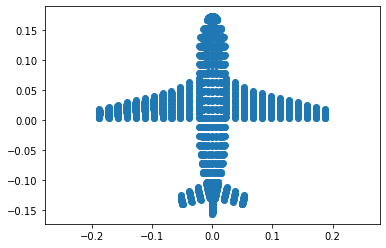

In [3]:
ones=np.ones((1,points.shape[1]))
X=np.concatenate((points,ones),axis=0)
R=np.array([[1,0,0],[0,1,0],[0,0,1]])
K=np.array([[1,0,0],[0,1,0],[0,0,1]])
t=np.array([[0],[0],[-4000]])
P1=K@np.concatenate((R,t),axis=1)
X1=P1@X
X1=X1/X1[2,:]

fig,ax=plt.subplots(1,1,sharex=True,sharey=True)
ax.scatter(X1[0,:],X1[1,:])
ax.axis('equal')
plt.show()


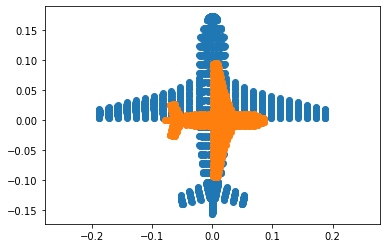

In [4]:
ones=np.ones((1,points.shape[1]))
X=np.concatenate((points,ones),axis=0)
R=np.array([[1,0,0],[0,1,0],[0,0,1]])
K=np.array([[1,0,0],[0,1,0],[0,0,1]])
t=np.array([[0],[0],[-4000]])
P1=K@np.concatenate((R,t),axis=1)
R=np.array([[0,1,0],[1,0,0],[0,0,1]])
K=np.array([[0.5,0,0],[0,0.5,0],[0,0,1]])
t=np.array([[0],[0],[-4000]])
P2=K@np.concatenate((R,t),axis=1)
X1=P1@X
X2=P2@X
X1=X1/X1[2,:]
X2=X2/X2[2,:]

fig,ax=plt.subplots(1,1,sharex=True,sharey=True)
ax.scatter(X1[0,:],X1[1,:])
ax.scatter(X2[0,:],X2[1,:])
ax.axis('equal')
plt.show()

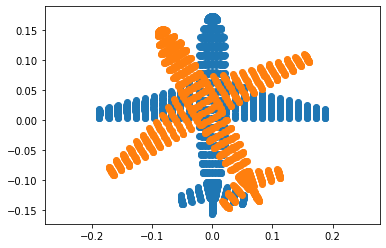

In [5]:
ones=np.ones((1,points.shape[1]))
X=np.concatenate((points,ones),axis=0)
R=np.array([[1,0,0],[0,1,0],[0,0,1]])
K=np.array([[1,0,0],[0,1,0],[0,0,1]])
t=np.array([[0],[0],[-4000]])
P1=K@np.concatenate((R,t),axis=1)
R=np.array([[np.sqrt(3)/2,-1/2,0],[1/2,np.sqrt(3)/2,0],[0,0,1]])
K=np.array([[1,0,0],[0,1,0],[0,0,1]])
t=np.array([[0],[0],[-4000]])
P2=K@np.concatenate((R,t),axis=1)
X1=P1@X
X2=P2@X
X1=X1/X1[2,:]
X2=X2/X2[2,:]

fig,ax=plt.subplots(1,1,sharex=True,sharey=True)
ax.scatter(X1[0,:],X1[1,:])
ax.scatter(X2[0,:],X2[1,:])
ax.axis('equal')
plt.show()

Text(0.5, 0, 'Z')

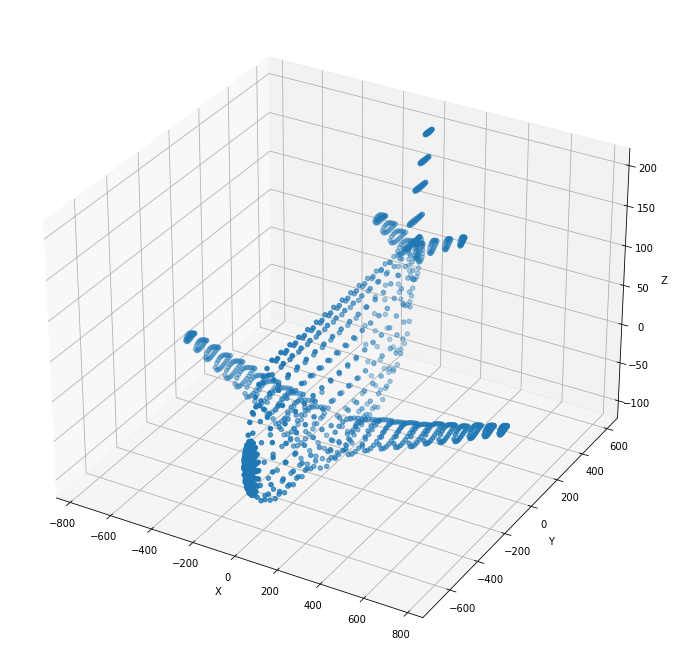

In [6]:
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(points[0,:],points[1,:],points[2,:])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

Item 1 , area in pixels = 59143
Item 1 , area in mm^2 = 0.0023186421720000003
Item 2 , area in pixels = 59211
Item 2 , area in mm^2 = 0.002321308044


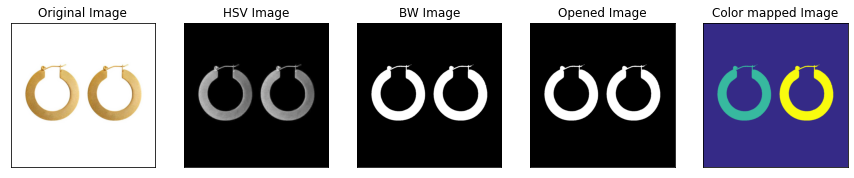

In [8]:
import cv2 as cv
import numpy as np
img=cv.imread(r'Images/earrings.jpg',cv.IMREAD_COLOR)
assert img is not None
hsv=cv.cvtColor(img,cv.COLOR_BGR2HSV)
th,bw=cv.threshold(hsv[:,:,1],0,255,cv.THRESH_BINARY + cv.THRESH_OTSU)

#Remove dots in the object foreground using closing
w=5
kernel=np.ones((w,w),np.uint8)
opened=cv.morphologyEx(bw,cv.MORPH_CLOSE,kernel)

retval,labels,stats,centroids=cv.connectedComponentsWithStats(bw)
colormapped=cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'),cv.COLORMAP_PARULA)

z=720 # mm
f= 8 # mm
for i,s in enumerate(stats):
    if i!=0:
        print('Item',i,', area in pixels =',s[4])
        print('Item',i,', area in mm^2 =',s[4]*(2.2e-6)**2*(z*z)/(f*f))

fig,ax=plt.subplots(1,5,sharex='all',sharey='all',figsize=(15,15))
ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].set_xticks([]) , ax[0].set_yticks([])
ax[1].imshow(cv.cvtColor(hsv[:,:,1],cv.COLOR_BGR2RGB))
ax[1].set_title("HSV Image")
ax[1].set_xticks([]) , ax[1].set_yticks([])
ax[2].imshow(cv.cvtColor(bw,cv.COLOR_BGR2RGB))
ax[2].set_title("BW Image")
ax[2].set_xticks([]) , ax[2].set_yticks([])
ax[3].imshow(cv.cvtColor(opened,cv.COLOR_BGR2RGB))
ax[3].set_title("Opened Image")
ax[3].set_xticks([]) , ax[3].set_yticks([])
ax[4].imshow(cv.cvtColor(colormapped,cv.COLOR_BGR2RGB))
ax[4].set_title("Color mapped Image")
ax[4].set_xticks([]) , ax[4].set_yticks([])
plt.show()

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img=cv.imread(r'Images/allenkeys.jpg',cv.IMREAD_REDUCED_GRAYSCALE_2)
canny=cv.Canny(img,50,150)

# Copy edges to the images that will display the results in BGR
canny_color=cv.cvtColor(canny,cv.COLOR_GRAY2BGR)

lines=cv.HoughLines(canny,1,np.pi/180,170,None,0,0)

if lines is not None:
    for i in range(0,len(lines)):
        rho=lines[i][0][0]
        theta=lines[i][0][1]
        a=np.cos(theta)
        b=np.sin(theta)
        x0=a*rho
        y0=b*rho
        pt1=(int(x0 + 1000*(-b)),int(y0 + 1000*(a)))
        pt2=(int(x0 - 1000*(-b)),int(y0 - 1000*(a)))
        cv.line(canny_color,pt1,pt2,(0,0,255),1,cv.LINE_AA)


r=cv.selectROI('Canny Image',canny_color,showCrosshair = True, fromCenter = False)
cv.waitKey(0)
print(r)

x0,y0=int(r[0] + r[2]/2),int(r[1] + r[3]/2)
m=b/a # Gradient
m=np.tan(np.median(lines[:,0,1]))
c=y0-m*x0 # Intercept

cv.line(canny_color,(0,int(c)),(img.shape[0],int(m*img.shape[0] + c)),(0,255,0),2,cv.LINE_AA)







In [ ]:
cv.namedWindow('Images',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',img)
cv.waitKey(0)
cv.imshow('Image',canny)
cv.waitKey(0)
cv.imshow('Image',canny_color)
cv.waitKey(0)

cv.imshow('Image',canny_color)
cv.waitKey(0)
cv.destroyAllWindows()
dy=1
y_sub_pixel = np.arange(0,img.shape[0]-1,dy)
f_sub_pixel = np.zeros_like(y_sub_pixel)
f_sub_pixel_nn = np.zeros_like(y_sub_pixel)

z=720 # mm
f= 8 # mm
for i,y in enumerate(y_sub_pixel):
    if i!=0:
        print('Item',i,', area in pixels =',y[4])
        print('Item',i,', area in mm^2 =',y[4]*(2.2e-6)**2*(z*z)/(f*f))  

fig,ax=plt.subplots(figsize=(30,5))
ax.plot(f_sub_pixel_nn)